In [1]:
import pandas as pd
import os

dir = r'data/IDM/'

files = os.listdir(dir)


In [56]:
files = sorted(files)

In [2]:
from datetime import datetime, timedelta

godz = 'Godz.'
# num = ['Prognoza', 'Rzeczywista wartość']
# num = ['CRO']

def format(raw_data, num: list):
    df = raw_data.copy()
    a_mask = df[godz].apply(lambda x: 'A' in str(x))
    df.drop(index=df[a_mask].index, inplace=True)
    df[godz] = df[godz].astype(str)
    mask = (df[godz] == '24')
    df[godz] = df[godz].replace({'24': '0'}).apply(lambda x: x if len(x) > 1 else f'0{x}')
    tt = pd.to_datetime(df[['Data', godz]].astype(str).agg(' '.join, axis=1), format="%Y-%m-%d %H")
    tt.loc[mask] = tt.loc[mask].apply(lambda x: x + timedelta(days=1))
    df['Time'] = tt
    df.drop(columns=['Data', godz], inplace=True)
    df.rename(columns={'Dobowa prognoza zapotrzebowania KSE': 'Prognoza', 'Rzeczywiste zapotrzebowanie KSE': 'Rzeczywista wartość'}, inplace=True)
    df[num] = df[num].replace({' ': '', '\xa0': '', ',': '.'}, regex=True)
    df[num] = df[num].apply(pd.to_numeric)
    df.set_index('Time', inplace=True)
    return df


df = pd.concat([pd.read_csv(dir + file, sep=';', parse_dates=['Data'], encoding='windows-1252') for file in files], ignore_index=True)
df

,Data,Godzina,COR,CRO,CROs,CROz
0,2018-01-01,1,-,"72,05","72,05","72,05"
1,2018-01-01,2,-,"72,05","72,05","72,05"
2,2018-01-01,3,-,"72,05","72,05","72,05"
3,2018-01-01,4,-,"72,05","72,05","72,05"
4,2018-01-01,5,-,"71,15","71,15","71,15"
...,...,...,...,...,...,...
44083,2023-01-11,20,NaN,"736,43","736,43","736,43"
44084,2023-01-11,21,NaN,"736,41","736,41","736,41"
44085,2023-01-11,22,NaN,"683,26","683,26","683,26"
44086,2023-01-11,23,NaN,"643,47","643,47","643,47"


In [1]:
r = pd.read_csv('ZAP_KSE_20230101to20230111_20230112000552.csv', delimiter=';')
dem = format(r, ['Rzeczywista wartość', 'Prognoza'])

NameError: name 'pd' is not defined

<AxesSubplot: xlabel='Time'>

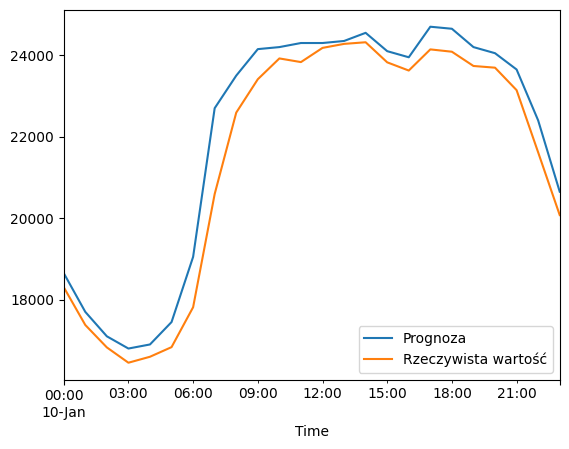

In [4]:
xd = dem[(dem.index >= '01-10-2023') & (dem.index < '01-11-2023')]
xd.plot()

In [13]:
import pandas as pd

ac = pd.read_csv('data/IDM.csv', parse_dates=['Time'], index_col='Time')
da = pd.read_csv('data/DAM.csv', parse_dates=['Time'], index_col='Time')

<AxesSubplot: xlabel='Time'>

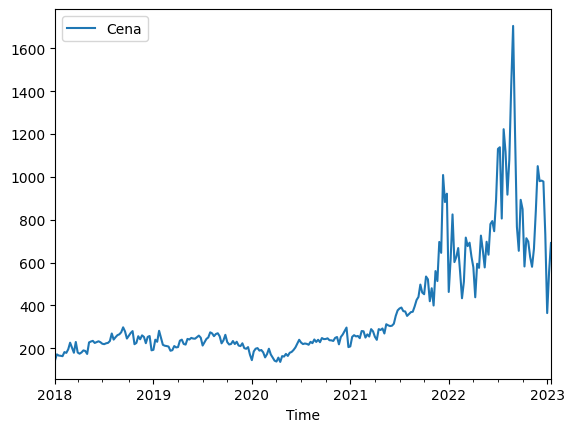

In [19]:
da.rename(columns={'RCE':'Cena'}).resample('W').mean().plot()

In [79]:
act = ac[(ac.index >= '01-10-2023') & (ac.index < '01-11-2023')]
dam = da[(da.index >= '01-10-2023') & (da.index < '01-11-2023')]

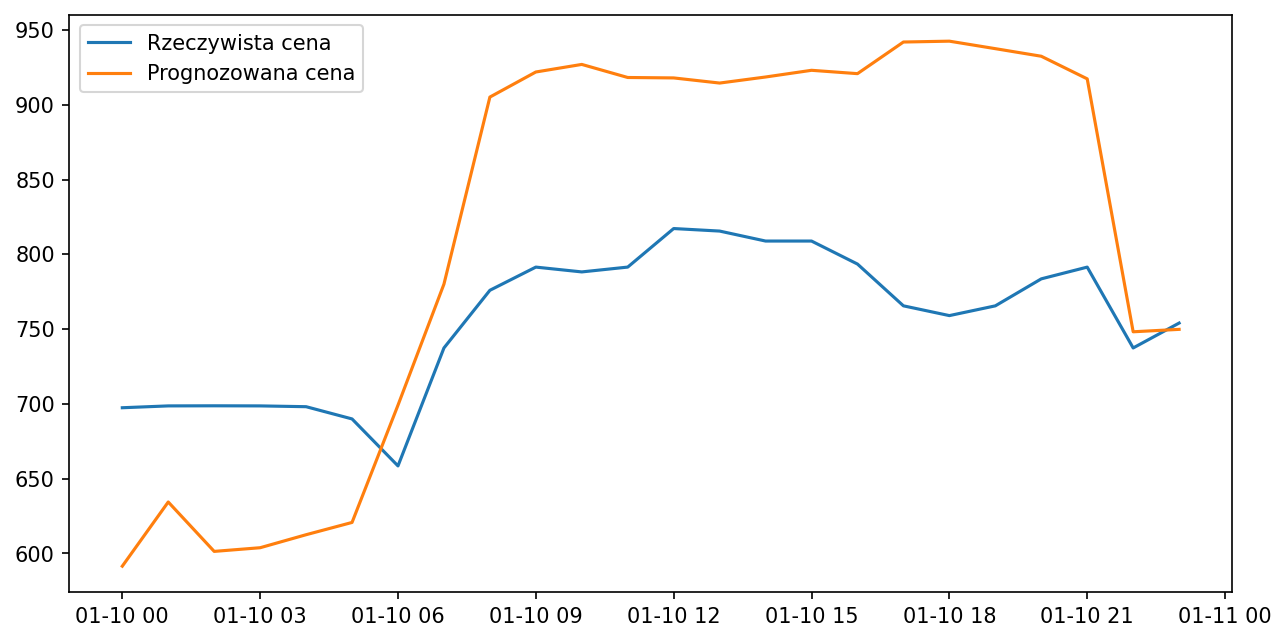

In [80]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5), dpi=150)

# act.plot()
# day_ahead.plot()
plt.plot(act.index, act)
plt.plot(dam.index, dam)
plt.legend(['Rzeczywista cena', 'Prognozowana cena'])

C:\Users\wojte\AppData\Local\Temp\ipykernel_2220\2232043470.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train = (ac.index > '01.01.2018') & (ac.index < '31.12.2020')
C:\Users\wojte\AppData\Local\Temp\ipykernel_2220\2232043470.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  valid = (ac.index > '31.12.2020') & (ac.index < '31.12.2021')
C:\Users\wojte\AppData\Local\Temp\ipykernel_2220\2232043470.py:14: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test = (ac.index > '01.01.2022') & (ac.index < '31.12.2022')


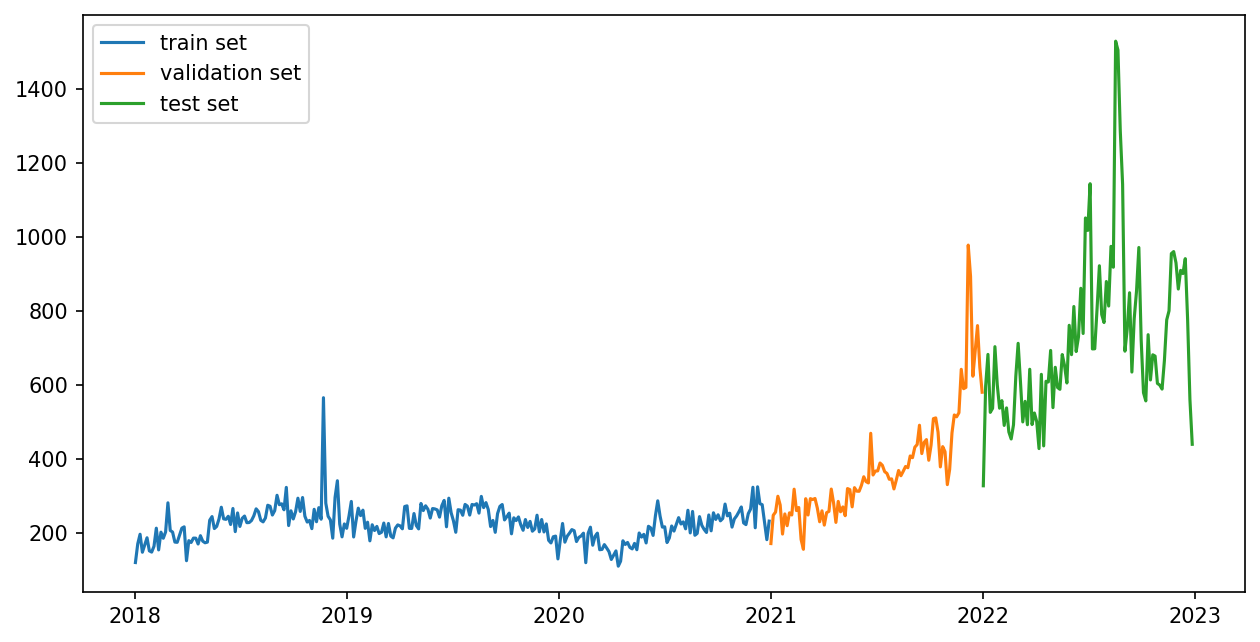

In [3]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5), dpi=150)
freq = '4D'

train = (ac.index > '01.01.2018') & (ac.index < '31.12.2020')
plt.plot(ac.loc[train].resample(freq).mean())
# ac.loc[train].resample('W').mean().plot(label='train set', ax=ax)

valid = (ac.index > '31.12.2020') & (ac.index < '31.12.2021')
plt.plot(ac.loc[valid].resample(freq).mean())


test = (ac.index > '01.01.2022') & (ac.index < '31.12.2022')
plt.plot(ac.loc[test].resample(freq).mean())


plt.legend(['train set', 'validation set', 'test set'])
plt.show()




In [2]:
import pandas as pd

w = pd.read_csv('data/weather_data.csv', parse_dates=['Time'], index_col='Time')

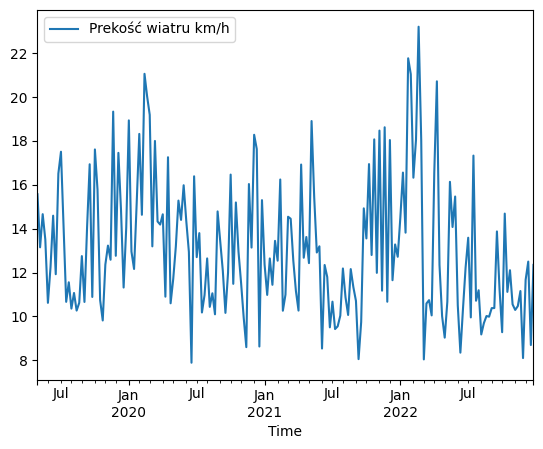

In [9]:
from matplotlib import pyplot as plt

w['Prędkość wiatru'].resample('W').mean().plot()
plt.legend(['Prędkość wiatru km/h'])

In [11]:
c1 = (w.index > '17.08.2022') & (w.index < '18.08.2022')
w[c1].iloc[[20]]


C:\Users\wojte\AppData\Local\Temp\ipykernel_9716\2613235145.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  c1 = (w.index > '17.08.2022') & (w.index < '18.08.2022')


,Kierunek wiatru,Opad atmosferyczny,Podmuchy wiatru,Pogoda,Prędkość wiatru,Siła wiatru,Temperatura,Widoczność,Wilgotność,Zachmurzenie
Time,,,,,,,,,,
2022-08-17 21:00:00,ESE,0.0,17.3,Bezchmurnie,9.0,112.0,24.6,10.0,56.0,23.0
